In [53]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [54]:
#Specifying file path and loading csv file
filepath = "../data/nobel.csv"
nobel = pd.read_csv(filepath)
nobel.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


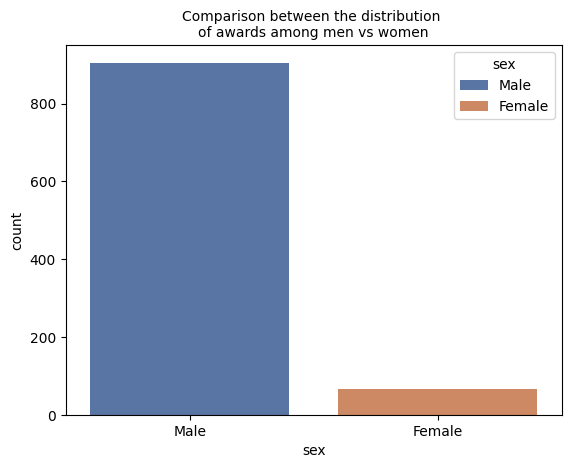

The gender that has received the most Nobel awards is Male


In [55]:
# Distribution of gender 
top_gender = nobel['sex'].value_counts().index[0]

gender_plot = sns.countplot(
    x='sex', 
    data=nobel, 
    hue='sex')
plt.title('Comparison between the distribution \nof awards among men vs women', fontsize=10)
plt.show()
print(f"The gender that has received the most Nobel awards is {top_gender}")

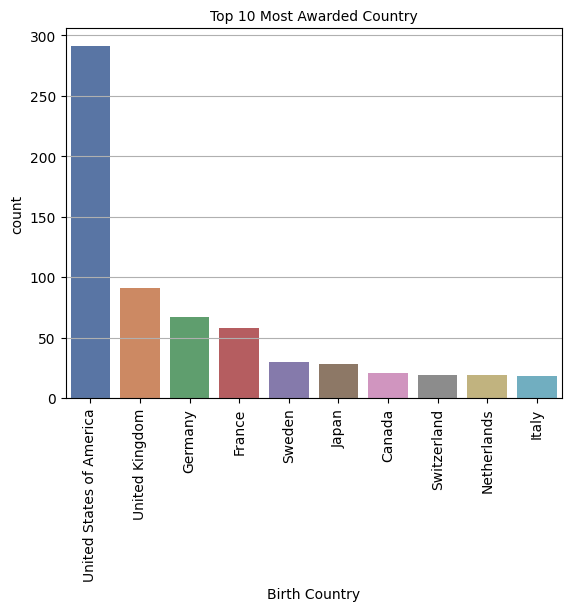

The country that has received the most Nobel Prizes is United States of America


In [56]:
#Identifying the top country with most awards
top_country = nobel['birth_country'].value_counts().index[0]

#Filtering top 10 most awarded countries
top_10_country = nobel['birth_country'].value_counts().head(10).reset_index()

#changing column names
top_10_country.columns = ['birth_country', 'count']

#changing birth_country data type
top_10_country['birth_country'] = top_10_country['birth_country'].astype('string')

#plotting top_10_country
sns.barplot(x='birth_country', y='count', data=top_10_country, hue='birth_country')

plt.xticks(rotation=90)
plt.title('Top 10 Most Awarded Country', fontsize=10)
plt.xlabel('Birth Country')
plt.grid(True, axis='y')
plt.show()
print(f"The country that has received the most Nobel Prizes is {top_country}")

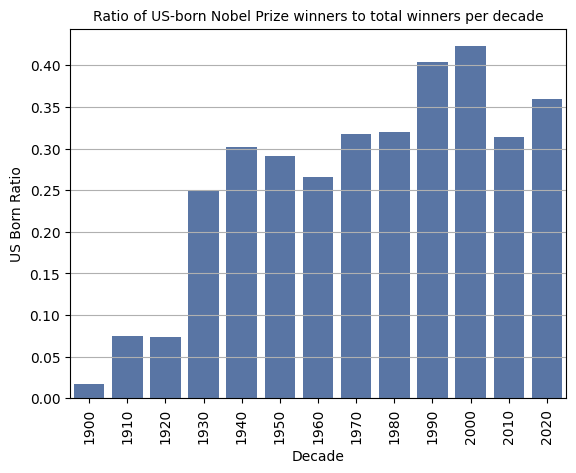

In [57]:
# Creating the US-born winners column
nobel['us_born'] = nobel['birth_country'] == "United States of America"

# Creating a decade column
nobel['decade'] = np.floor(nobel['year'] / 10) * 10
nobel['decade'] = nobel['decade'].astype(int)

# Grouping by decade
decade_stats = nobel.groupby('decade', as_index=False)['us_born'].mean()

# Identifying the decade with the highest proportion of US-born winners
max_decade_usa = decade_stats.loc[decade_stats['us_born'].idxmax(), 'decade']

# Creating a relational plot

sns.barplot(x='decade', y='us_born', data=decade_stats)

plt.xticks(rotation=90)
plt.title('Ratio of US-born Nobel Prize winners to total winners per decade', fontsize=10)
plt.xlabel('Decade')
plt.ylabel('US Born Ratio')
plt.grid(True, axis='y')
plt.show()

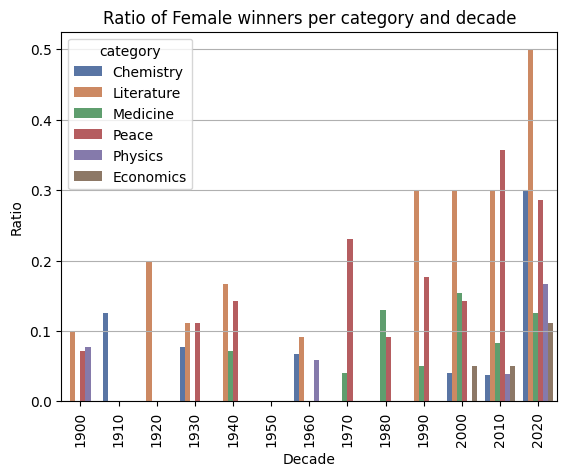

The decade with the highest ratio of female Nobel Prize winners is 2020 in the 'Literature' category.


In [58]:
# Creating the Female winners column
nobel['is_female'] = nobel['sex'] == "Female"

# Creating a decade column
nobel['decade'] = np.floor(nobel['year'] / 10) * 10
nobel['decade'] = nobel['decade'].astype(int)

# Selecting is_female column to get the mean female per decade and category
decade_stats = nobel.groupby(['decade', 'category'], as_index=False)['is_female'].mean()

# Extracting the index of the maximum value of is_female column
max_female_ind = decade_stats['is_female'].idxmax()

# Creating a key-value pair
max_female_dict = {decade_stats.loc[max_female_ind, 'decade']:decade_stats.loc[max_female_ind, 'category']
}

# Creating a relational plot
sns.set_palette('deep')
sns.barplot(x='decade', y='is_female', data=decade_stats, hue='category')

plt.xticks(rotation=90)
plt.title('Ratio of Female winners per category and decade')
plt.xlabel('Decade')
plt.ylabel('Ratio')
plt.grid(True, axis='y')
plt.show()
print(f"The decade with the highest ratio of female Nobel Prize winners is {list(max_female_dict.keys())[0]} in the '{list(max_female_dict.values())[0]}' category.")


In [59]:
#Subset female winners
female_winners = nobel[nobel['is_female'] == True]

#Selecting the name and category of the first instance in female_winners
first_woman_name = female_winners['full_name'].iloc[0]
first_woman_category = female_winners['category'].iloc[0]

print(f"{first_woman_name} was the first woman to win the Nobel Prize, in the {first_woman_category} category.")


Marie Curie, née Sklodowska was the first woman to win the Nobel Prize, in the Physics category.


In [60]:
# Counting instances where an individual/organization is awarded by Nobel
winner_count = nobel['full_name'].value_counts()

# Filtering individual/organization who won 2 or more Nobel awards
repeat_list = winner_count[winner_count >= 2]

print("The following are the individuals/organizations who have won multiple Nobel Prizes:")
for name, count in repeat_list.items():
    print(f"{name} has won the Nobel Prize {count} times.")


The following are the individuals/organizations who have won multiple Nobel Prizes:
Comité international de la Croix Rouge (International Committee of the Red Cross) has won the Nobel Prize 3 times.
Linus Carl Pauling has won the Nobel Prize 2 times.
John Bardeen has won the Nobel Prize 2 times.
Frederick Sanger has won the Nobel Prize 2 times.
Marie Curie, née Sklodowska has won the Nobel Prize 2 times.
Office of the United Nations High Commissioner for Refugees (UNHCR) has won the Nobel Prize 2 times.
